## Condition Based Maintenance of Naval Propulsion Plants Data Set

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing python libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
import warnings
warnings.simplefilter("ignore")

#### Fetching data from the txt file

In [3]:
column_names = ['lp','v','gtt','gtn','ggn','ts','tp','t48', 't1','t2','p48','p1','p2','pexh','tic','mf','GT compressor','GT turbine']
dataset = pd.read_csv('/content/drive/MyDrive/Navya/UCI CBM Dataset/data.txt', sep='  ', names=column_names)
dataset.head()

,lp,v,gtt,gtn,ggn,ts,tp,t48,t1,t2,p48,p1,p2,pexh,tic,mf,GT compressor,GT turbine
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [4]:
dataset.shape

(11934, 18)

dataset contains 11934 total samples with 18 features, out of which 'GT turbine' is chosen as the target feature.

##### ABOUT ATTRIBUTES

- Lever position as (lp)
- Ship speed as (v) in [knots]
- Gas Turbine as (GT) & shaft torque as (GTT) in [kN m]
- GT rate of revolutions as (GTn) in [rpm]
- Gas Generator rate of revolutions (GGn) in [rpm]
- Starboard Propeller Torque as (Ts) in [kN]
- Port Propeller Torque as (Tp) in [kN]
- Hight Pressure as (HP) Turbine exit temperature as (T48) in [C]
- GT Compressor inlet air temperature as (T1)in [C]
- GT Compressor outlet air temperature as (T2) in [C]
- HP Turbine exit pressure as (P48) in [bar]
- GT Compressor inlet air pressure as (P1) in [bar]
- GT Compressor outlet air pressure as (P2) in [bar]
- GT exhaust gas pressure as (Pexh) in [bar]
- Turbine Injecton Control as (TIC) in [%]
- Fuel flow as (mf) in [kg/s]
- GT Compressor decay state coefficient as GT compressor(constant)
- GT Turbine decay state coefficient as GT turbine(constant)

What our data concludes will be given by its statistical report as given in upcoming two cells.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lp             11934 non-null  float64
 1   v              11934 non-null  float64
 2   gtt            11934 non-null  float64
 3   gtn            11934 non-null  float64
 4   ggn            11934 non-null  float64
 5   ts             11934 non-null  float64
 6   tp             11934 non-null  float64
 7   t48            11934 non-null  float64
 8   t1             11934 non-null  float64
 9   t2             11934 non-null  float64
 10  p48            11934 non-null  float64
 11  p1             11934 non-null  float64
 12  p2             11934 non-null  float64
 13  pexh           11934 non-null  float64
 14  tic            11934 non-null  float64
 15  mf             11934 non-null  float64
 16  GT compressor  11934 non-null  float64
 17  GT turbine     11934 non-null  float64
dtypes: flo

It states that the data is having values of float type neither int nor object.

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
lp,11934.0,5.166667,2.626388e+00,1.138,3.14400,5.1400,7.14800,9.300
v,11934.0,15.000000,7.746291e+00,3.000,9.00000,15.0000,21.00000,27.000
gtt,11934.0,27247.498685,2.214861e+04,253.547,8375.88375,21630.6590,39001.42675,72784.872
gtn,11934.0,2136.289256,7.740839e+02,1307.675,1386.75800,1924.3260,2678.07900,3560.741
ggn,11934.0,8200.947312,1.091316e+03,6589.002,7058.32400,8482.0815,9132.60600,9797.103
ts,11934.0,227.335768,2.004959e+02,5.304,60.31700,175.2680,332.36475,645.249
tp,11934.0,227.335768,2.004959e+02,5.304,60.31700,175.2680,332.36475,645.249
t48,11934.0,735.495446,1.736806e+02,442.364,589.87275,706.0380,834.06625,1115.797
t1,11934.0,288.000000,0.000000e+00,288.000,288.00000,288.0000,288.00000,288.000
t2,11934.0,646.215331,7.267588e+01,540.442,578.09225,637.1415,693.92450,789.094


Above information tells the 25, 50, and 70 percentile of each attribute along with its mean, standard deviation, min-max values

### Exploratory Analysis of dataset
Exploring dataset using some visualization measures

In [7]:
#total null values in each attribute
dataset.isna().sum()

lp               0
v                0
gtt              0
gtn              0
ggn              0
ts               0
tp               0
t48              0
t1               0
t2               0
p48              0
p1               0
p2               0
pexh             0
tic              0
mf               0
GT compressor    0
GT turbine       0
dtype: int64

The dataset is clean as it's not having any NaN value

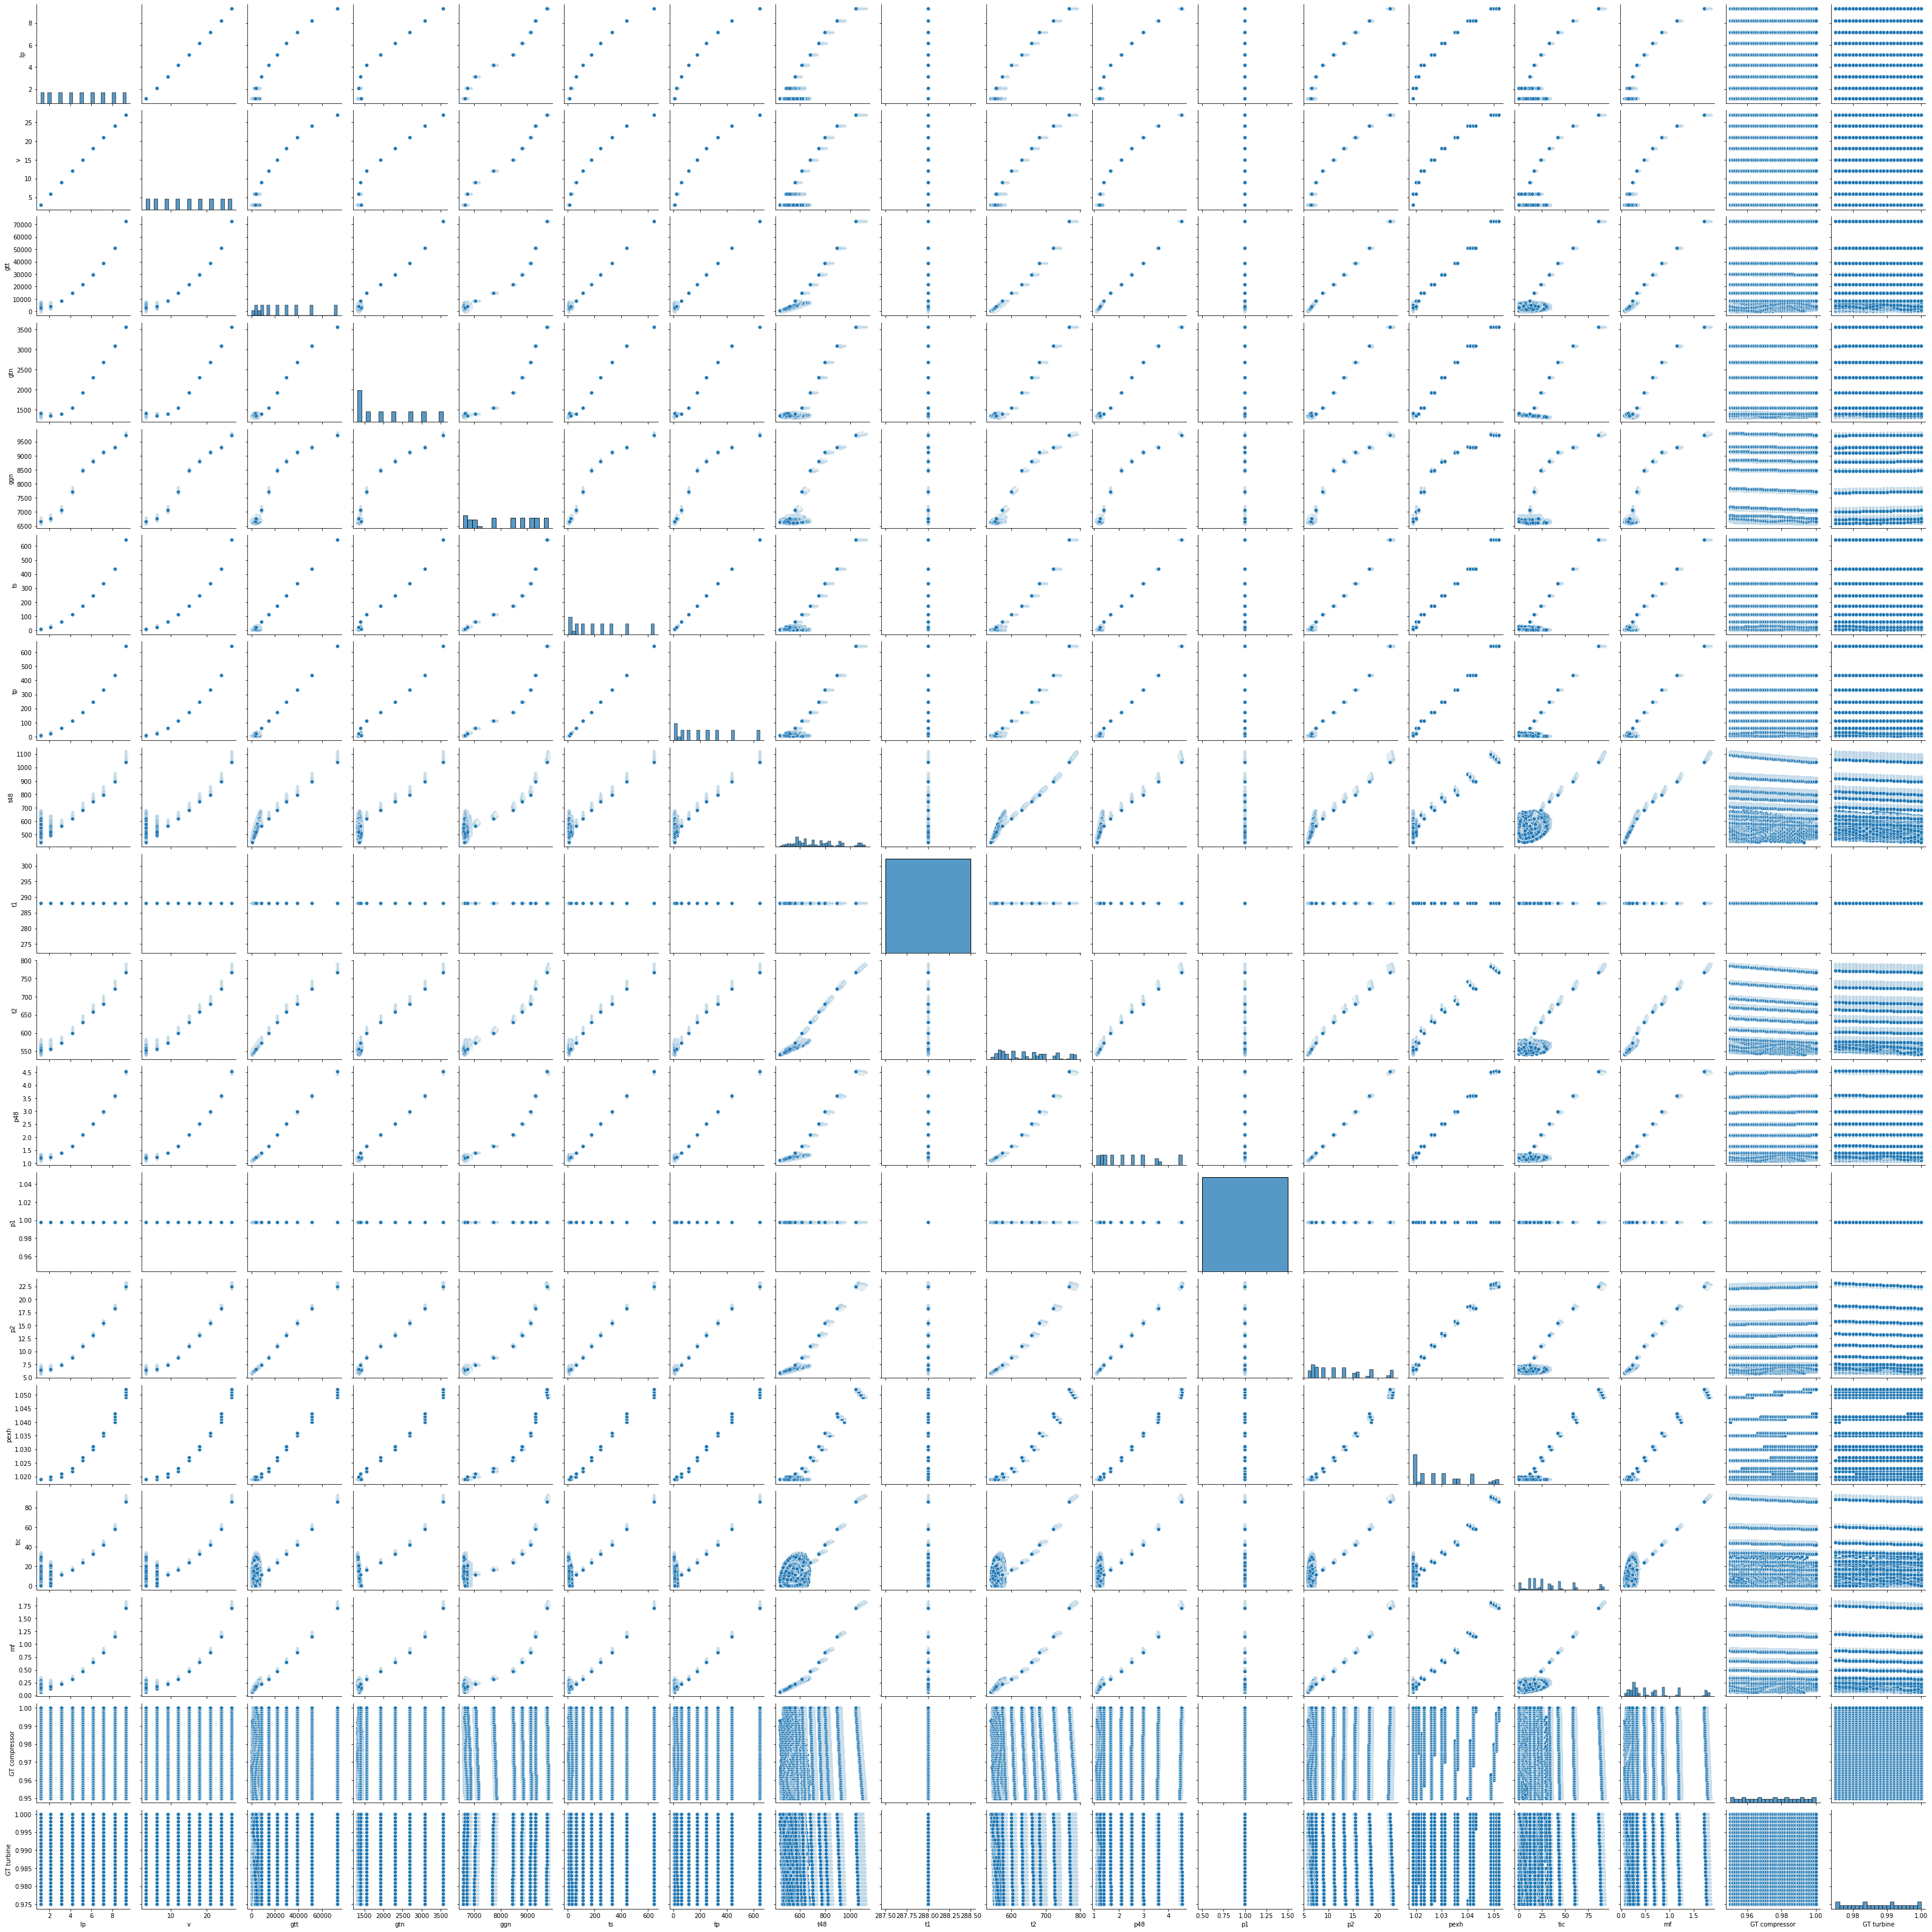

In [8]:
sns.pairplot(dataset)

Above pairplots state that the data with respect to the features are expressing linear behavior. The values are linearly plotted.

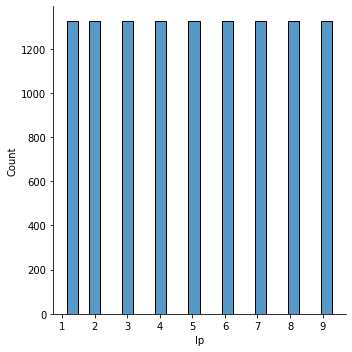

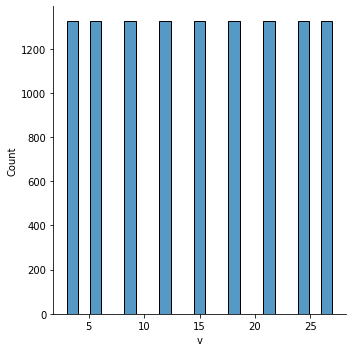

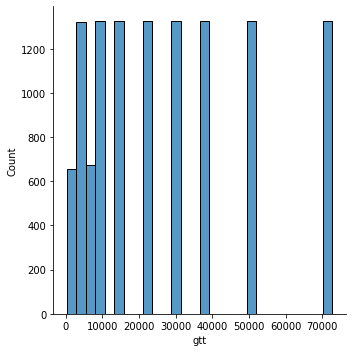

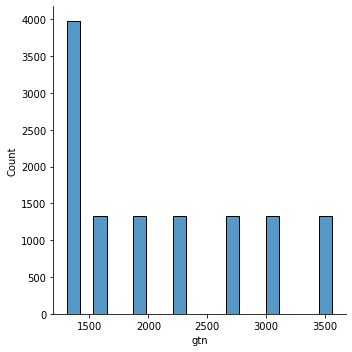

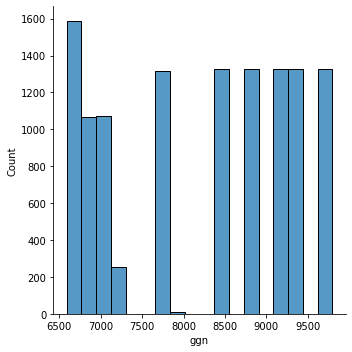

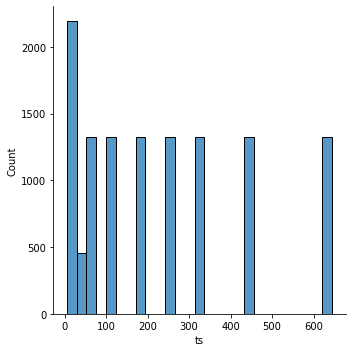

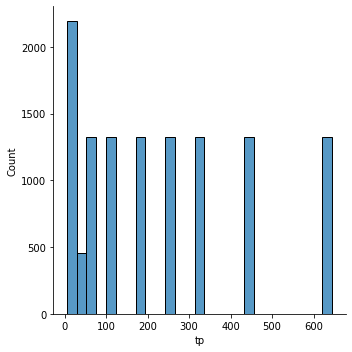

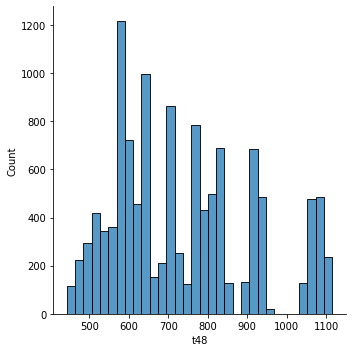

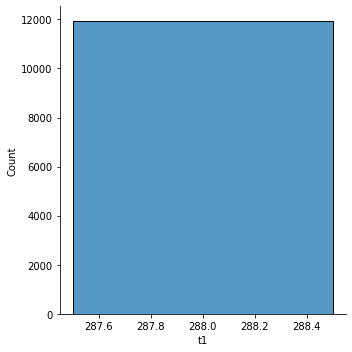

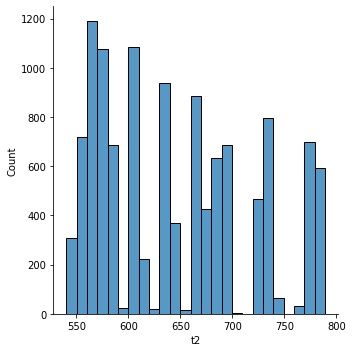

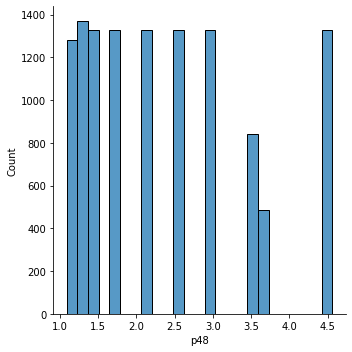

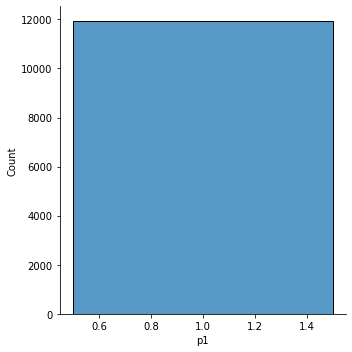

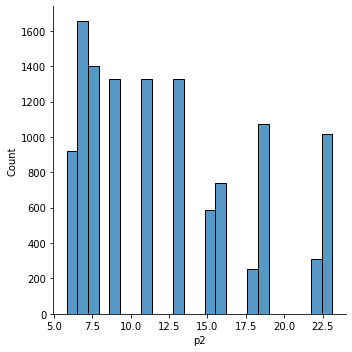

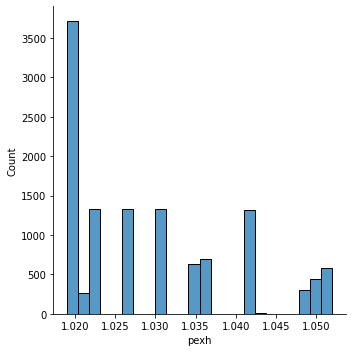

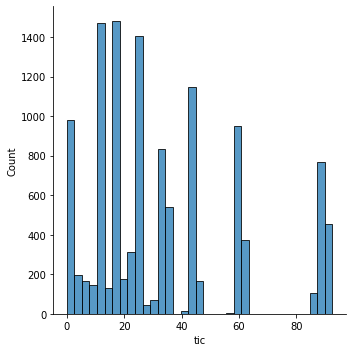

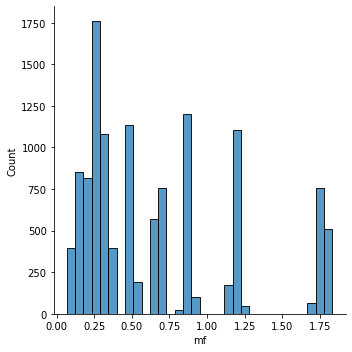

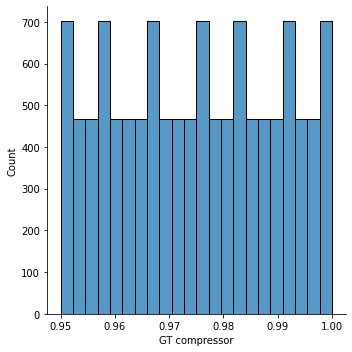

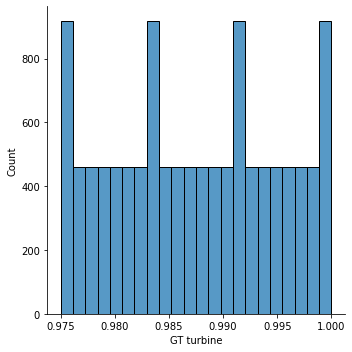

In [9]:
cols=dataset.columns   
index=0
for row in range(len(cols)):
      sns.displot(dataset[cols[index]])
      index=index+1
plt.tight_layout()

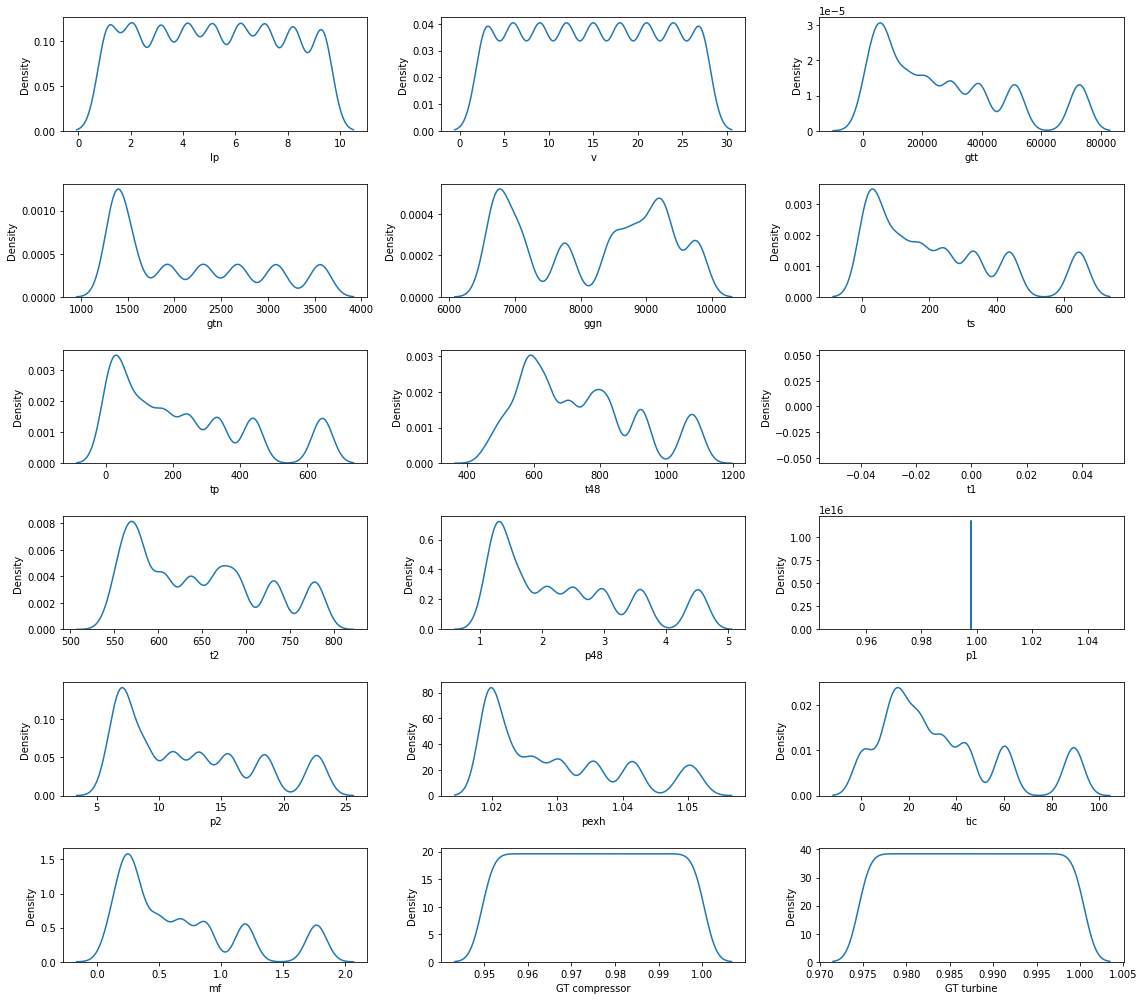

In [10]:
num_rows=6
num_cols=3
fig, ax=plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16,14))
cols=dataset.columns   
index=0
for row in range(num_rows):
    for col in range(num_cols):
        sns.kdeplot(dataset[cols[index]],ax=ax[row][col])
        index=index+1
plt.tight_layout()


observing above displots and kdeplots, values of some features seem categorical and redundant whereas in some feautures the values ranges in normally distributed pattern

### Data preparation and preprocessing

If we observe features' values, the data needs to be scaled as the min and max values are too far from each other that emits bad prediction. Better, if the values are scaled.

In [11]:
scaler = StandardScaler()

##### Splitting data into features and target

In [12]:
X = dataset.drop('GT turbine', axis=1)
y = dataset['GT turbine']

##### Standard Scaling

In [13]:
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = [col for col in dataset.columns if col!='GT turbine'])

Below, given the scaled dataset with all values scaled close to each other and having the same information as they have previously

In [14]:
X

,lp,v,gtt,gtn,ggn,ts,tp,t48,t1,t2,p48,p1,p2,pexh,tic,mf,GT compressor
0,-1.533984,-1.549193,-1.217172,-1.016470,-1.396142,-1.096087,-1.096087,-1.563219,0.0,-1.316205,-1.158785,1.0,-1.189780,-1.008090,-1.025696,-1.144602,-1.698416
1,-1.172255,-1.161895,-0.916002,-0.982006,-1.257689,-0.993238,-0.993238,-0.576338,0.0,-0.888328,-0.942140,1.0,-0.939650,-1.008090,-0.889552,-0.740351,-1.698416
2,-0.770165,-0.774597,-0.851930,-0.968324,-0.998045,-0.832859,-0.832859,-0.745615,0.0,-0.806743,-0.888671,1.0,-0.884940,-0.911843,-0.795474,-0.795566,-1.698416
3,-0.382925,-0.387298,-0.565436,-0.760704,-0.374167,-0.566428,-0.566428,-0.426228,0.0,-0.445343,-0.640681,1.0,-0.616448,-0.719348,-0.601087,-0.600342,-1.698416
4,-0.010154,0.000000,-0.253348,-0.273853,0.269255,-0.259516,-0.259516,-0.023040,0.0,-0.007889,-0.253486,1.0,-0.206123,-0.334358,-0.281276,-0.276941,-1.698416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,-0.010154,0.000000,-0.253867,-0.273815,0.246562,-0.259850,-0.259850,-0.309993,0.0,-0.237576,-0.245189,1.0,-0.244907,-0.238110,-0.380734,-0.377511,1.698416
11930,0.383940,0.387298,0.113588,0.220212,0.549273,0.092865,0.092865,0.068574,0.0,0.173898,0.146615,1.0,0.152116,0.146879,-0.037548,-0.030446,1.698416
11931,0.754426,0.774597,0.530817,0.699905,0.843001,0.523989,0.523989,0.351013,0.0,0.470295,0.579905,1.0,0.585112,0.628117,0.327502,0.338310,1.698416
11932,1.157278,1.161895,1.072125,1.228787,1.007383,1.050880,1.050880,0.906585,0.0,1.043219,1.144104,1.0,1.123407,1.301849,0.945142,0.959476,1.698416


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

after the preparation of data and futher preprocessing, data is being splitted into training and testing sets so as to train and test the models, respectively

### Model1: XGBoost Regressor

In [16]:
#model initantiation
xgb = XGBRegressor(random_state=42)

###### Hyperparamter tuning 

In [17]:
#setting up the parameters
param_test ={'n_estimators': [100, 50, 200, 500],
             'max_depth': [4,6,8,2], 
             'eta': [0.1, 0.3, 0.2, 0.4], 
             'min_child_weight': [1, 2],
             }

R_search = RandomizedSearchCV(
    estimator = xgb, param_distributions = param_test, 
    scoring='explained_variance',
    cv=2,
    n_iter = 10,
    refit=True,
    random_state=42,
    verbose=True)

###### fitting the tuner

In [18]:
#fitting the tuner with training sets
R_search.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[11:06:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[11:06:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:06:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:06:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:06:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:06:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:07:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:07:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   18.4s finished


[11:07:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                 

Tuner's estimation

In [19]:
#tuner's best score
R_search.best_score_

0.9831741940738769

over xgboost regressor, the tuner, with the best parameters, gives 0.98 as its best score

In [20]:
R_search.best_params_

{'eta': 0.3, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 500}

Best parameters for the XGBoost regressor comes out to be as shown above

In [21]:
R_search.cv_results_

{'mean_fit_time': array([1.85520589, 0.72369254, 1.73057747, 1.42111635, 1.02386391,
        0.28031087, 0.20910764, 0.7052635 , 0.35963953, 0.57089663]),
 'mean_score_time': array([0.05594456, 0.02932012, 0.06017029, 0.0480727 , 0.03581989,
        0.01226413, 0.00997806, 0.02694881, 0.01403809, 0.0206275 ]),
 'mean_test_score': array([0.98317419, 0.97067962, 0.98296875, 0.94628501, 0.97071042,
        0.64590484, 0.7089687 , 0.97067962, 0.90656417, 0.82075314]),
 'param_eta': masked_array(data=[0.3, 0.3, 0.1, 0.1, 0.4, 0.3, 0.2, 0.4, 0.2, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[8, 6, 8, 2, 4, 2, 4, 6, 8, 2],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[2, 1,

explained summary is given about the tuning process over each parameter.

In [22]:
#model training
xgb_model = R_search.best_estimator_
xgb_model.fit(X_train, y_train) 

xgb_pred = xgb_model.predict(X_test)

[11:07:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


##### models's performance

In [23]:
print('explained variance score: ', explained_variance_score(y_test, xgb_pred))
print('mean squared error: ', mean_squared_error(y_test, xgb_pred))
print('mean absolute error: ', mean_absolute_error(y_test, xgb_pred))
print('root mean squared error: ', (mean_squared_error(y_test, xgb_pred)**(1/2)))

explained variance score:  0.9916460211069055
mean squared error:  4.77978085092413e-07
mean absolute error:  0.00046249647983508053
root mean squared error:  0.0006913595917410946


### Model2: Linear Regression

In [24]:
#model initantiation
linear = LinearRegression()

###### Hyperparamter tuning 

In [25]:
param_test ={'fit_intercept': [True, False],
             'normalize': [True, False], 
             'n_jobs': [-1,0,1]
             }

R_search = RandomizedSearchCV(
    estimator=linear, param_distributions=param_test, 
    scoring='explained_variance',
    cv=2,
    n_iter = 10,
    refit=True,
    random_state=42,
    verbose=True)

###### fitting the tuner

In [26]:
#fitting the tuner with training sets
R_search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'fit_intercept': [True, False],
                                        'n_jobs': [-1, 0, 1],
                                        'normalize': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='explained_variance',
                   verbose=True)

###### tuner's estimation

In [27]:
R_search.best_score_

0.9437643379290015

over Linear regressor, the tuner, with the best parameters, gives 0.94 as its best score

In [28]:
R_search.best_params_

{'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

Best parameters for the Linear regressor comes out to be as shown above

In [29]:
R_search.cv_results_

{'mean_fit_time': array([0.01075768, 0.02022541, 0.01342356, 0.01254964, 0.01380956,
        0.01208818, 0.00600529, 0.00565457, 0.00628304, 0.00547969]),
 'mean_score_time': array([0.0053612 , 0.00307488, 0.0039053 , 0.00419724, 0.00425446,
        0.00224864, 0.00204575, 0.00208604, 0.00202501, 0.00200522]),
 'mean_test_score': array([0.94376434, 0.94376434, 0.94376434, 0.94376434, 0.94376434,
        0.94376434, 0.94376434, 0.94376434, 0.94376434, 0.94376434]),
 'param_fit_intercept': masked_array(data=[False, False, True, False, True, True, True, False,
                    True, False],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_jobs': masked_array(data=[1, 0, -1, 0, 1, 0, -1, 1, 1, -1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'para

explained summary is given about the tuning process over each parameter.

In [30]:
#model training
linear_model = R_search.best_estimator_
linear_model.fit(X_train, y_train) 

linear_pred = linear_model.predict(X_test)

##### models's performance

In [31]:
print('explained variance score: ', explained_variance_score(y_test, linear_pred))
print('mean squared error: ', mean_squared_error(y_test, linear_pred))
print('mean absolute error: ', mean_absolute_error(y_test, linear_pred))
print('root mean squared error: ', (mean_squared_error(y_test, linear_pred)**(1/2)))

explained variance score:  0.9422774704011949
mean squared error:  3.307623935179045e-06
mean absolute error:  0.0012089390840027646
root mean squared error:  0.0018186874209657484


### Model3: RandomForest Regressor

In [32]:
#model instantiation
rforest_model = RandomForestRegressor(random_state=42)

In [33]:
#model training
rforest_model.fit(X_train, y_train) 

#model prediction
rforest_pred = rforest_model.predict(X_test)

##### models's performance

In [34]:
print('explained variance score: ', explained_variance_score(y_test, rforest_pred))
print('mean squared error: ', mean_squared_error(y_test, rforest_pred))
print('mean absolute error: ', mean_absolute_error(y_test, rforest_pred))
print('root mean squared error: ', (mean_squared_error(y_test, rforest_pred)**(1/2)))

explained variance score:  0.993949148986262
mean squared error:  3.462919403715106e-07
mean absolute error:  0.0003098781466384406
root mean squared error:  0.0005884657512306988


#### Choosing the model

<function matplotlib.pyplot.plot>

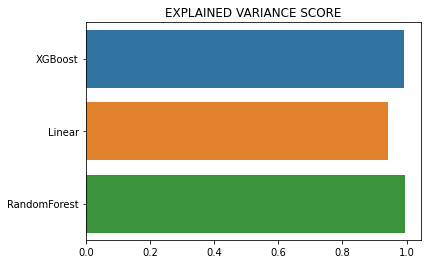

In [35]:
#comparison of models using explained_variance_score
variance_scores = [explained_variance_score(y_test, xgb_pred), explained_variance_score(y_test, linear_pred), explained_variance_score(y_test, rforest_pred)]
sns.barplot(variance_scores,['XGBoost', 'Linear', 'RandomForest'])
plt.title('EXPLAINED VARIANCE SCORE')
plt.plot

<function matplotlib.pyplot.plot>

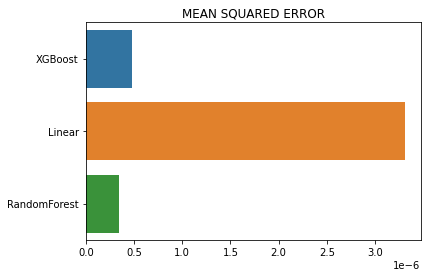

In [36]:
mse = [mean_squared_error(y_test, xgb_pred), mean_squared_error(y_test, linear_pred), mean_squared_error(y_test, rforest_pred)]
sns.barplot(mse,['XGBoost', 'Linear', 'RandomForest'])
plt.title('MEAN SQUARED ERROR')
plt.plot

<function matplotlib.pyplot.plot>

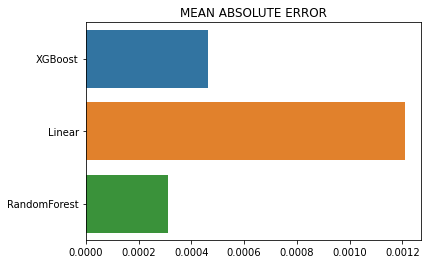

In [37]:
mae = [mean_absolute_error(y_test, xgb_pred), mean_absolute_error(y_test, linear_pred), mean_absolute_error(y_test, rforest_pred)]
sns.barplot(mae,['XGBoost', 'Linear', 'RandomForest'])
plt.title('MEAN ABSOLUTE ERROR')
plt.plot

<function matplotlib.pyplot.plot>

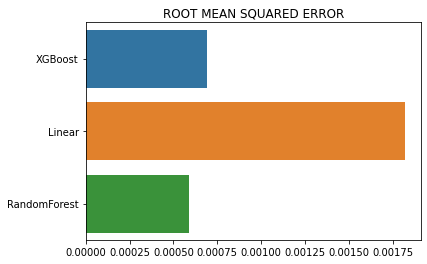

In [38]:
rmse = [(mean_squared_error(y_test, xgb_pred)**(1/2)), (mean_squared_error(y_test, linear_pred)**(1/2)), (mean_squared_error(y_test, rforest_pred)**(1/2))]
sns.barplot(rmse,['XGBoost', 'Linear', 'RandomForest'])
plt.title('ROOT MEAN SQUARED ERROR')
plt.plot

#### Observing the performance plots as shown above, it can be clearly seen that **Random Forest regressor is having highest varaince score of about 0.99 with least errors (rmse) as 0.0005, among all** whereas other two algorithms are having higher mean squared error as shown in the above plots. Random Forest regressor is coming forward in the race with higher accurcy and less errors. Therefore, Random Forest regressor can be choosen as the best regressor for condition based maintenance of naval propulsion plants dataset.